In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse.csgraph as csg
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.special import erf
from time import time
matplotlib.rcParams['figure.figsize'] = [7,7]
def gcum(z):
    return (1 + erf(z/np.sqrt(2))) * 0.5

load data for the grid

# ALL NEW

In [13]:
dim = 2
grid = np.loadtxt("fs0.1-qs0.95.grid")[:,0:5]
x = grid[:,0:dim]
ni = np.asarray(grid[:,dim],int)-1
pi = grid[:,dim+1]
ei = grid[:,dim+2]
ncls = np.max(ni)+1
ngrid = len(ni)

In [4]:
lcls = []
Qi = np.zeros(ncls)
for i in xrange(ncls):
    icls = np.where(ni == i)[0]
    Qi[i] = np.exp(pi[icls]).sum()
    lcls.append(icls)

In [5]:
nbs = 32
nibs = np.zeros((nbs,ngrid),int)
nclsbs = np.zeros(nbs,int)
nibs = np.asarray(np.loadtxt("fs0.1-qs0.95.bs"),int) - 1
for bs in xrange(nbs):
    nclsbs[bs] = np.max(nibs[bs])+1

this is the new thing courtesy of Gareth

In [17]:
QA = np.zeros((nbs,np.max(nclsbs)))
for bs in xrange(nbs):
    for i in xrange(nclsbs[bs]):
        icls = np.where(nibs[bs] == i)[0]
        QA[bs,i] = np.exp(pi[icls]).sum()

QAi = np.zeros((nbs,np.max(nclsbs),ncls))
for bs in xrange(nbs):
    for i in xrange(nclsbs[bs]):
        icls = np.where(nibs[bs] == i)[0]
        for j in xrange(ncls):
            inter = np.intersect1d(icls, lcls[j])
            QAi[bs,i,j] = np.exp(pi[inter]).sum()

nij = np.zeros((ncls,ncls))
for i in xrange(ncls):
    for j in xrange(i+1):        
        tij = 0
        for bs in xrange(nbs):
            for k in xrange(nclsbs[bs]):
                tij += QAi[bs,k,i] * QAi[bs,k,j] / (QA[bs,k])                
        nij[i,j] = nij[j,i] = tij/nbs
nij /= np.exp(pi).sum()
py = np.zeros(ncls)
for i in xrange(ncls):
    py[i] = np.exp(pi[lcls[i]]).sum()
py/=np.exp(pi).sum()

nnij = nij/ np.sqrt(np.multiply.outer(py,py))
print nnij.diagonal()

[ 0.94740201  0.80221779  0.88785426  0.74401351  0.7282574   0.73027772
  0.886022    0.89354438  0.79217749  0.87078685  0.81930007  0.80665462
  0.88898277  0.89353241  0.65060606  0.48492108  0.71428318  0.87603704
  0.84657101  0.61065599  0.98342358  0.89527698  0.82289026  0.75943973
  0.74840915  0.73754049  0.84279083  0.73144934  0.90875279  0.72607739
  0.66430282  0.83513594  0.93736719  0.63852382  0.70687395  0.50408336
  0.73709544  0.84702019  0.71404127  0.63387939  0.4842061   0.99895353
  0.38741152  0.64683184  0.61909232  0.66761663  0.34750244  0.64708446
  0.88372992  0.4155515   0.61135373]


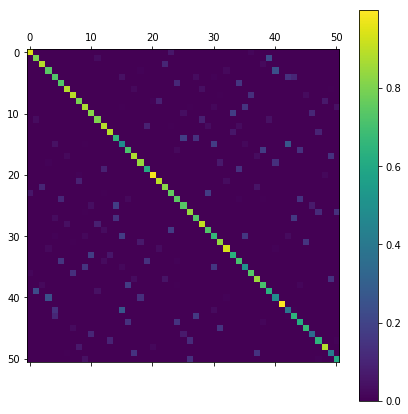

In [18]:
plt.matshow(nnij)
plt.colorbar()
plt.show()

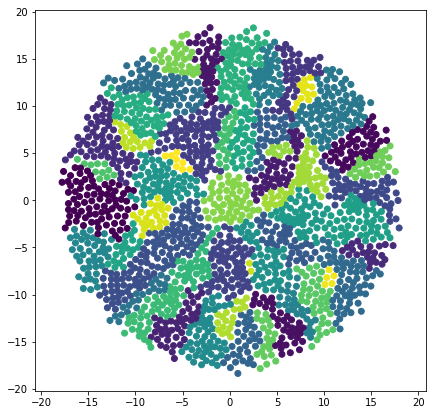

In [70]:
plt.scatter(x[:,0],x[:,1],c=ni)
#plt.scatter(x[lcls[4],0],x[lcls[4],1],color='black',s=5)
plt.axes().set_aspect('equal','datalim')
plt.show()

In [23]:
cij = nnij>0.005
cgraph=csg.csgraph_from_dense(cij, null_value=False)
cc=csg.connected_components(cgraph)
cc[0]

3

In [24]:
macro = []
imacro = np.ones(ngrid)*-1
for i in xrange(cc[0]):
    mci = np.zeros(0,int)
    for j in xrange(ncls):
        if cc[1][j] == i:
            mci = np.union1d(mci, lcls[j])
            imacro[lcls[j]] = i
    macro.append(mci)

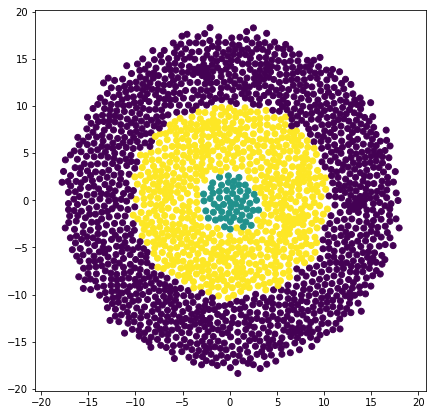

In [25]:
plt.scatter(x[:,0],x[:,1],c=imacro)
plt.axes().set_aspect('equal','datalim')
plt.show()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


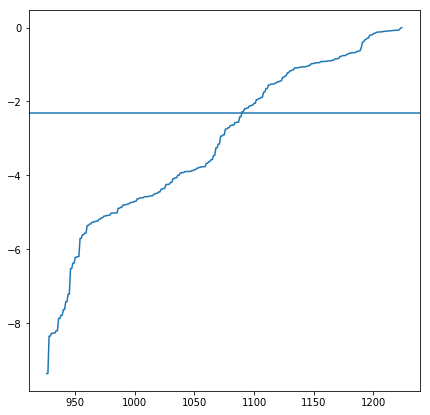

In [26]:
plt.plot(np.log10(np.sort(nnij.flatten())))
plt.axhline(np.log10(0.005))
plt.show()

In [678]:
np.exp(-7)

0.00091188196555451624

In [19]:
Z = linkage(nnij, 'ward')
linkage?

In [31]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(nnij))
c

0.41616062369462065

In [34]:
Z[3]

array([  7.        ,  30.        ,   0.59779336,   2.        ])

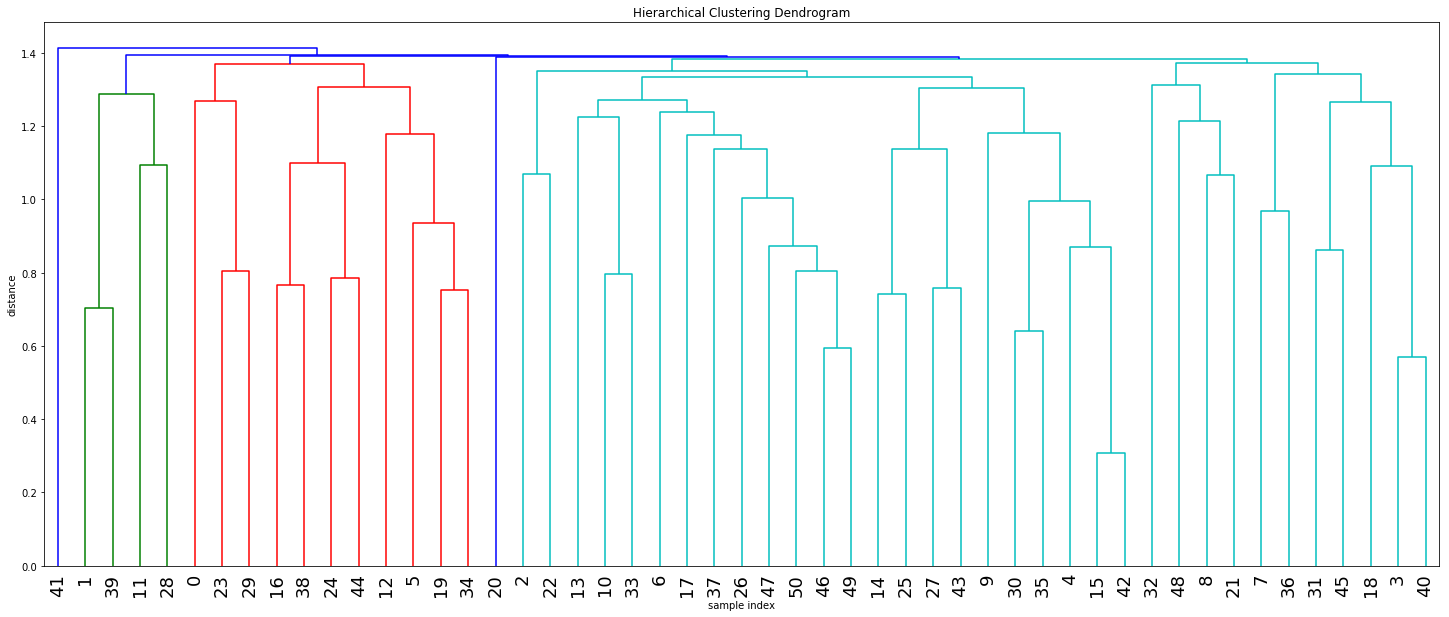

In [22]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    color_threshold=1.385,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
)
plt.show()

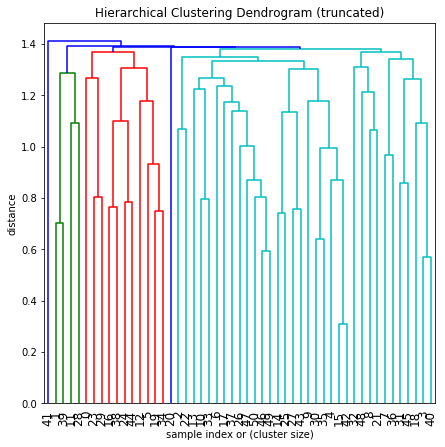

In [21]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    color_threshold=1.385,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,  # to get a distribution impression in truncated branches
)
plt.show()

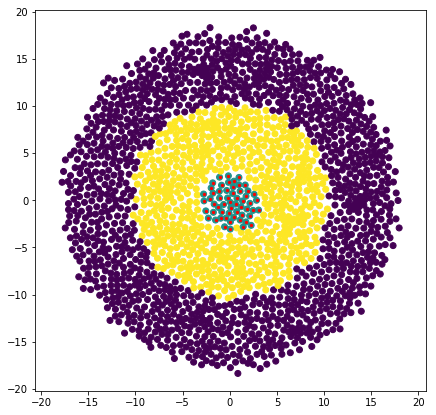

In [41]:
plt.scatter(x[:,0],x[:,1],c=imacro)
plt.scatter(x[lcls[4],0],x[lcls[4],1],color='red',s=5)
plt.axes().set_aspect('equal','datalim')
plt.show()